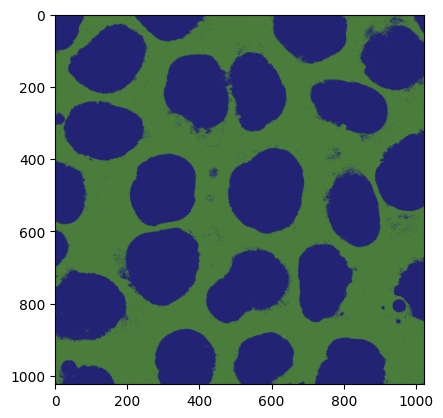

In [6]:
from Functions.sklearn import skcluster_image


bild = plt.imread('Original_Images/Clustering/Data/Cell_Nuclei.tiff')
clustertes_bild = skcluster_image(bild, n_clusters=2)
plt.imshow(clustertes_bild.astype('uint8'))
plt.show()
